## **Chapter 17: Linear Regression**
### **Exercise 1: Baseball**
- Yêu cầu: Áp dụng Line Regression để dự đoán cân nặng dựa trên
chiều cao
- Cho dữ liệu baseball_2D.txt. Hãy áp dụng Line Regression để dự đoán cân nặng dựa trên
chiều cao
- Đọc dữ liệu và gán cho biến data.
- Xem thông tin data: head(), số dòng, số cột, str, summary
- Chỉnh dữ liệu theo công thức: chiều cao (m) = chiều cao (inch) * 0.0254, cân nặng (kg) = cân
nặng (pound) * 0.453592.
- Vẽ biểu đồ quan sát mối liên hệ giữa inputs và outputs data (scatter plot)
- Kiểm tra outliers => loại outliers
- Tạo train:test từ dữ liệu data với tỉ lệ 70:30
- Thực hiện Linenear Regression với X_train, y_train.
- In summary của model
- Dự đoán y_pred từ test => so sánh với y_test
- Tính Mean Square Error (mse)
- Tính Coefficients, Intercept và Variance score
- Cho chiều cao lần lượt: x <- c(1.775, 1.825, 1.925) => dự đoán cân nặng
- Vẽ hình và xem kết quả

In [ ]:
# https://drive.google.com/file/d/1CcpD3j-h-PQrKrGOxOwYV2qfJWTsL1cq/view?usp=sharing
system('gdown --id 1CcpD3j-h-PQrKrGOxOwYV2qfJWTsL1cq')

In [ ]:
# predict weight based on height
# open and read csv file
data <- read.csv("baseball.csv")
print(head(data))
print(is.data.frame(data))
print(paste("cols", ncol(data)))
print(paste("rows:",nrow(data)))


             Name Team       Position Height Weight   Age PosCategory
1   Adam_Donachie  BAL        Catcher     74    180 22.99     Catcher
2       Paul_Bako  BAL        Catcher     74    215 34.69     Catcher
3 Ramon_Hernandez  BAL        Catcher     72    210 30.78     Catcher
4    Kevin_Millar  BAL  First_Baseman     72    210 35.43   Infielder
5     Chris_Gomez  BAL  First_Baseman     73    188 35.71   Infielder
6   Brian_Roberts  BAL Second_Baseman     69    176 29.39   Infielder
[1] TRUE
[1] "cols 7"
[1] "rows: 1015"


In [ ]:
summary(data)

     Name               Team             Position             Height     
 Length:1015        Length:1015        Length:1015        Min.   :67.00  
 Class :character   Class :character   Class :character   1st Qu.:72.00  
 Mode  :character   Mode  :character   Mode  :character   Median :74.00  
                                                          Mean   :73.69  
                                                          3rd Qu.:75.00  
                                                          Max.   :83.00  
     Weight           Age        PosCategory       
 Min.   :150.0   Min.   :20.90   Length:1015       
 1st Qu.:186.0   1st Qu.:25.41   Class :character  
 Median :200.0   Median :27.90   Mode  :character  
 Mean   :201.3   Mean   :28.71                     
 3rd Qu.:215.0   3rd Qu.:31.19                     
 Max.   :290.0   Max.   :48.52                     

In [ ]:
str(data)

'data.frame':	1015 obs. of  7 variables:
 $ Name       : chr  "Adam_Donachie" "Paul_Bako" "Ramon_Hernandez" "Kevin_Millar" ...
 $ Team       : chr  "BAL" "BAL" "BAL" "BAL" ...
 $ Position   : chr  "Catcher" "Catcher" "Catcher" "First_Baseman" ...
 $ Height     : int  74 74 72 72 73 69 69 71 76 71 ...
 $ Weight     : int  180 215 210 210 188 176 209 200 231 180 ...
 $ Age        : num  23 34.7 30.8 35.4 35.7 ...
 $ PosCategory: chr  "Catcher" "Catcher" "Catcher" "Infielder" ...


In [ ]:
baseball <- data[c("Height", "Weight")]
print(head(baseball))

  Height Weight
1     74    180
2     74    215
3     72    210
4     72    210
5     73    188
6     69    176


In [ ]:
baseball["Height"] <- baseball["Height"] * 0.0254
baseball["Weight"] <- baseball["Weight"] * 0.453592

print("After preprocessing data:")
print(head(baseball))

[1] "After preprocessing data:"
  Height   Weight
1 1.8796 81.64656
2 1.8796 97.52228
3 1.8288 95.25432
4 1.8288 95.25432
5 1.8542 85.27530
6 1.7526 79.83219


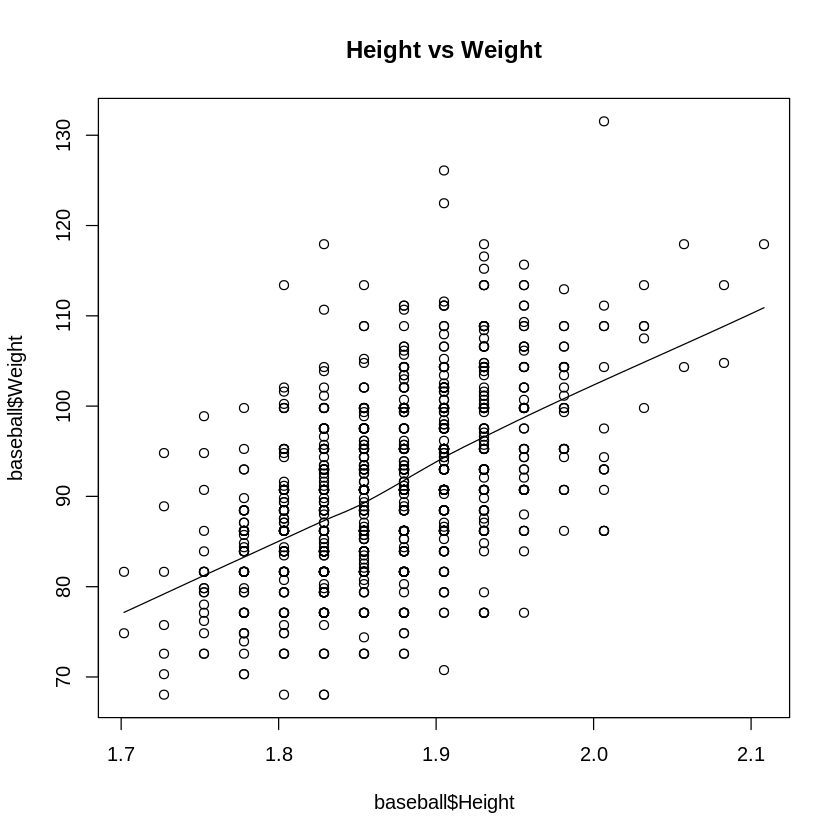

In [ ]:
scatter.smooth(x=baseball$Height, y=baseball$Weight, main="Height vs Weight") 


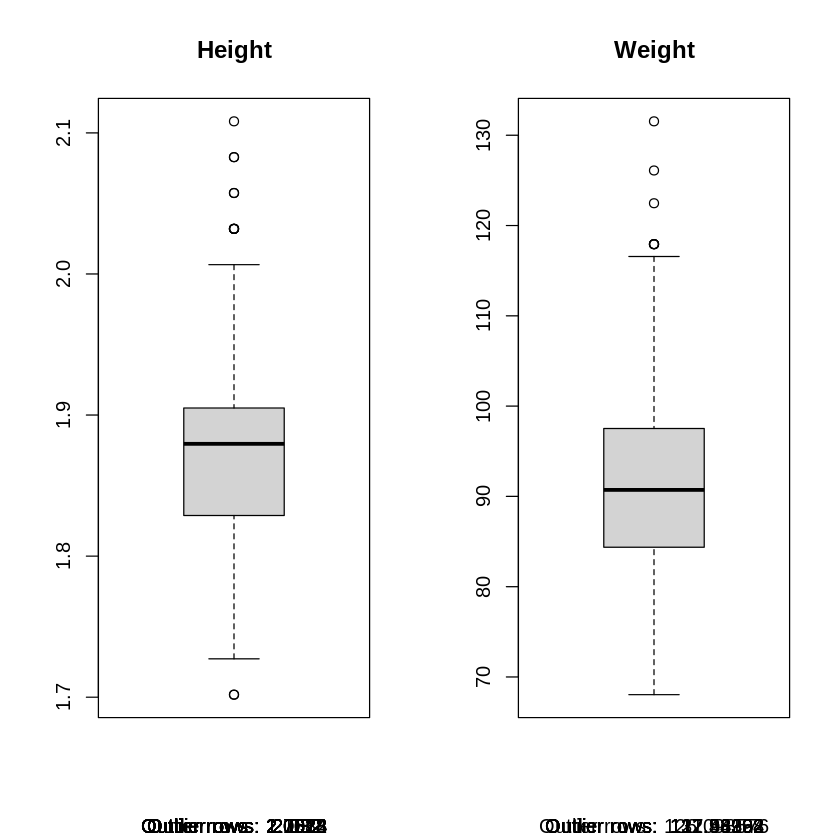

In [ ]:
# BoxPlot to Check for outliers
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(baseball$Height, main="Height", sub=paste("Outlier rows: ", 
        boxplot.stats(baseball$Height)$out)) 

boxplot(baseball$Weight, main="Weight", sub=paste("Outlier rows: ", 
        boxplot.stats(baseball$Weight)$out)) 


In [ ]:
# calculate correlation between Width and Length 
print(cor(baseball$Height, baseball$Weight)) 

wt_outliers <- c(boxplot.stats(baseball$Weight)$out)
print("wt_outliers: ")
print(wt_outliers)

ht_outliers <- c(boxplot.stats(baseball$Height)$out)
print("ht_outliers: ")
print(ht_outliers)

[1] 0.5315393
[1] "wt_outliers: "
[1] 117.9339 122.4698 131.5417 126.0986 117.9339 117.9339 117.9339
[1] "ht_outliers: "
 [1] 2.0574 2.0320 2.0320 2.0320 2.0320 2.0828 2.0320 2.0574 2.0828 2.1082
[11] 1.7018 1.7018


In [ ]:
#drop rows have outliers
print(paste("Before drop:", nrow(baseball)))
for (record in wt_outliers){
    baseball <- baseball[baseball$Weight != record,] 
}

for (record in ht_outliers)
{
    baseball <- baseball[baseball$Height != record,] 
}

print(paste("After drop:", nrow(baseball)))

[1] "Before drop: 1015"
[1] "After drop: 998"


In [ ]:
set.seed(42) # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(baseball), 0.7*nrow(baseball)) 

In [ ]:
trainingData <- baseball[trainingRowIndex, ] # training data
testData <- baseball[-trainingRowIndex, ] # test data

In [ ]:
print("Rows of training data and test data:")
print(nrow(trainingData))
print(nrow(testData))

[1] "Rows of training data and test data:"
[1] 698
[1] 300


In [ ]:
# Develop the model on the training data and use it to predict the Length on test
lmMod <- lm(Weight ~ Height, data=trainingData) # build the model

In [ ]:
iPred <- predict(lmMod, testData) # predict length

# mean square error according to model
mse <- mean(lmMod$residuals^2)
print(paste("mse: ", mse))

[1] "mse:  62.1665992405897"


In [ ]:
# mean square error of testData
mse_test = mean((testData$Weight - iPred)^2)
print(paste("mse in test: ", mse_test))

[1] "mse in test:  57.1830374137475"


In [ ]:
summary(lmMod)$r.squared 
# => r^2 has low value, this model fits ~ 27% data => not good!


[1] 0.2241192

In [ ]:
# Review diagnostic measures.
print(summary (lmMod)) # model summary


Call:
lm(formula = Weight ~ Height, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.8230  -5.6531  -0.1704   5.1062  27.6049 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -52.482     10.113   -5.19 2.76e-07 ***
Height        76.675      5.408   14.18  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.896 on 696 degrees of freedom
Multiple R-squared:  0.2241,	Adjusted R-squared:  0.223 
F-statistic:   201 on 1 and 696 DF,  p-value: < 2.2e-16



In [ ]:
# model coefficients
print(coef(lmMod) )
# get beta estimate for height
beta_height <- coef(lmMod)["Height"] 
print(paste("slope: ",beta_height))
Intercept <- coef(lmMod)["(Intercept)"] 
print(paste("Intercept: ",Intercept))


(Intercept)      Height 
  -52.48233    76.67488 
[1] "slope:  76.6748792521462"
[1] "Intercept:  -52.4823323447604"


In [ ]:
# new predictions
# solution 1
x <- c(1.775, 1.825, 1.925)
y <- Intercept + beta_height * x 
print("Solution 1 - results:")
print(y)

[1] "Solution 1 - results:"
[1] 83.61558 87.44932 95.11681


In [ ]:
# solution 2
y1 <- predict(lmMod, data.frame(Height = x)) 
print("Solution 2 - results:")
print(y1)

[1] "Solution 2 - results:"
       1        2        3 
83.61558 87.44932 95.11681 


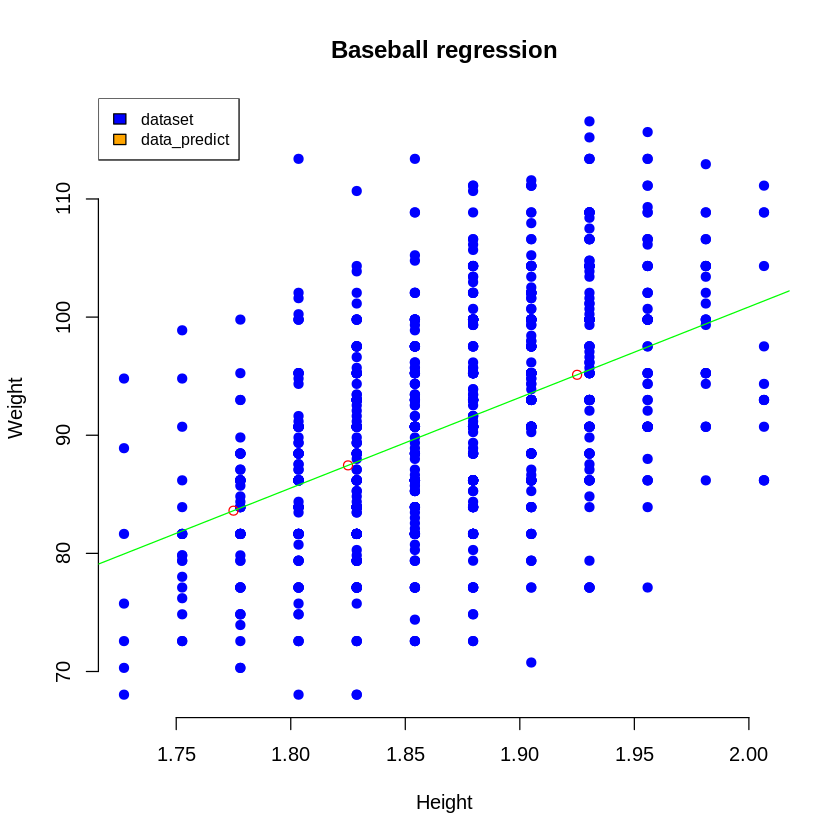

In [ ]:
# visualization
plot(baseball$Height, baseball$Weight, 
    main = "Baseball regression",
    xlab = "Height", ylab = "Weight",
    pch = 19, frame = FALSE, col= 'blue')

lines(x, y, col= 'red', type='p')

abline(lmMod, baseball, col = "green")
legend("topleft", c("dataset", "data_predict"), 
        cex=0.8, fill = c("blue", "orange"))
